In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.manifold import TSNE
pd.set_option('display.max_columns', None)

In [2]:
df_data = pd.read_csv('../data/sale_data/2_sale_enriched.csv')
df_data.head(2)

,citta,bagni,stanze,piano,regione,m2,quartiere,via,disponibilità,prezzo,delta_pubblicazione,totale_piani,ascensore,cucina,camere,tipologia_casa,classe_casa,tipologia_proprietà,n posti auto,box privato,balcone,impianto tv singolo,porta blindata,parzialmente arredato,cantina,esposizione doppia,arredato,caminetto,terrazza,impianto di allarme,portiere,piscina_idromassaggio,videocitofono,cancello elettrico,fibra ottica,armadio a muro,impianto tv centralizzato,mansarda,giardino,infissi,house_id,popolazione,reddito mediano,da ristrutturare,ristrutturato,ben collegato,lavanderia,ripostiglio,bagno finestrato,luminoso,parquet,aria condizionata,parchi e verde,ultimo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,emb_10,emb_11,emb_12,emb_13,emb_14,emb_15,emb_16,emb_17,emb_18,emb_19,emb_20,emb_21,emb_22,emb_23,emb_24,emb_25,emb_26,emb_27,emb_28,emb_29,emb_30,emb_31,emb_32,emb_33,emb_34,emb_35,emb_36,emb_37,emb_38,emb_39,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,emb_50,emb_51,emb_52,emb_53,emb_54,emb_55,emb_56,emb_57,emb_58,emb_59,emb_60,emb_61,emb_62,emb_63,emb_64,emb_65,emb_66,emb_67,emb_68,emb_69,emb_70,emb_71,emb_72,emb_73,emb_74,emb_75,emb_76,emb_77,emb_78,emb_79,emb_80,emb_81,emb_82,emb_83,emb_84,emb_85,emb_86,emb_87,emb_88,emb_89,emb_90,emb_91,emb_92,emb_93,emb_94,emb_95,emb_96,emb_97,emb_98,emb_99,emb_100,emb_101,emb_102,emb_103,emb_104,emb_105,emb_106,emb_107,emb_108,emb_109,emb_110,emb_111,emb_112,emb_113,emb_114,emb_115,emb_116,emb_117,emb_118,emb_119,emb_120,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127,emb_128,emb_129,emb_130,emb_131,emb_132,emb_133,emb_134,emb_135,emb_136,emb_137,emb_138,emb_139,emb_140,emb_141,emb_142,emb_143,emb_144,emb_145,emb_146,emb_147,emb_148,emb_149,emb_150,emb_151,emb_152,emb_153,emb_154,emb_155,emb_156,emb_157,emb_158,emb_159,emb_160,emb_161,emb_162,emb_163,emb_164,emb_165,emb_166,emb_167,emb_168,emb_169,emb_170,emb_171,emb_172,emb_173,emb_174,emb_175,emb_176,emb_177,emb_178,emb_179,emb_180,emb_181,emb_182,emb_183,emb_184,emb_185,emb_186,emb_187,emb_188,emb_189,emb_190,emb_191,emb_192,emb_193,emb_194,emb_195,emb_196,emb_197,emb_198,emb_199,emb_200,emb_201,emb_202,emb_203,emb_204,emb_205,emb_206,emb_207,emb_208,emb_209,emb_210,emb_211,emb_212,emb_213,emb_214,emb_215,emb_216,emb_217,emb_218,emb_219,emb_220,emb_221,emb_222,emb_223,emb_224,emb_225,emb_226,emb_227,emb_228,emb_229,emb_230,emb_231,emb_232,emb_233,emb_234,emb_235,emb_236,emb_237,emb_238,emb_239,emb_240,emb_241,emb_242,emb_243,emb_244,emb_245,emb_246,emb_247,emb_248,emb_249,emb_250,emb_251,emb_252,emb_253,emb_254,emb_255,log_prezzo,log_m2
0,rosignano marittimo,1,quadrilocale,1,toscana,100,Piazza Pietro Gori,missing,Libero,123000.0,0,2,0,cucina abitabile,2,Appartamento,Classe immobile media,Intera proprietà,0,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,missing,doppio,house_0,30072.0,36766,False,True,False,False,True,False,False,False,False,False,False,-0.930258,8.181437,-8.389849,7.210157,1.982074,0.274577,0.653333,-5.182276,3.674756,-4.342821,-6.019744,0.235730,-2.539239,-1.514031,-2.453443,0.131721,7.071939,1.002923,3.819647,6.025520,9.090433,-0.374973,0.562072,-2.121353,4.367691,-0.130907,1.807666,-1.101557,3.986045,-2.219569,4.388802,-3.154679,1.303793,-2.638471,2.696048,-1.301148,4.145055,1.518398,-1.804632,-1.785685,5.130158,1.424300,-0.278060,-1.287092,-5.700303,-1.439217,-2.194934,1.918560,0.215153,-0.973116,0.093529,-0.315647,-2.043961,0.069290,2.742904,-1.044386,-0.946206,0.129898,4.025322,1.415896,-0.961774,-0.213892,-1.683660,5.385186,1.071831,2.865823,3.866548,0.034632,0.167845,-1.425593,1.218222,-0.197709,-4.683671,0.962715,0.151255,3.62309,-0.124174,0.892814,0.877854,0.946363,1.657126,0.474424,0.789889,-0.636578,-0.495042,0.085721,-0.874449,0.542390,0.404212,1.535408,1.20029,-4.95626,-0.077154,-4.312568,-1.745757,-0.468283,-0.088375,0.885399,-0.634167,0.412924,0.008903,-0.796064,-1.758491,-0.678412,0.691800,0.46655

In [3]:
categoricals = ['bagni', 'stanze', 'piano', 'disponibilità', 
                'ascensore', 'cucina',
                'classe_casa', 'tipologia_proprietà', 'box privato',
                'balcone', 'impianto tv singolo', 'porta blindata',
                'parzialmente arredato', 'cantina', 'esposizione doppia', 'arredato',
                'caminetto', 'terrazza', 'impianto di allarme', 'portiere',
                'piscina_idromassaggio', 'videocitofono', 'cancello elettrico',
                'fibra ottica', 'armadio a muro', 'impianto tv centralizzato',
                'mansarda', 'giardino', 'infissi', 'da ristrutturare', 'ristrutturato',
                'ben collegato', 'lavanderia', 'ripostiglio', 'bagno finestrato',
                'luminoso', 'parquet', 'aria condizionata', 'parchi e verde', 'ultimo']

In [5]:
def plot_by_level(categorical_var, df, ax, var_to_plot='prezzo', cmap='Dark2'):
    n_categories = df[categorical_var].nunique()
    categories = df[categorical_var].unique()
    cmap=mpl.colormaps[cmap]
    colors=cmap(np.linspace(0, 1, n_categories))
    for idx in range(n_categories):
        cat = categories[idx]
        ax.hist(df[df[categorical_var]==cat][var_to_plot], bins=50, color=colors[idx], label=cat, alpha=0.7, density=True)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

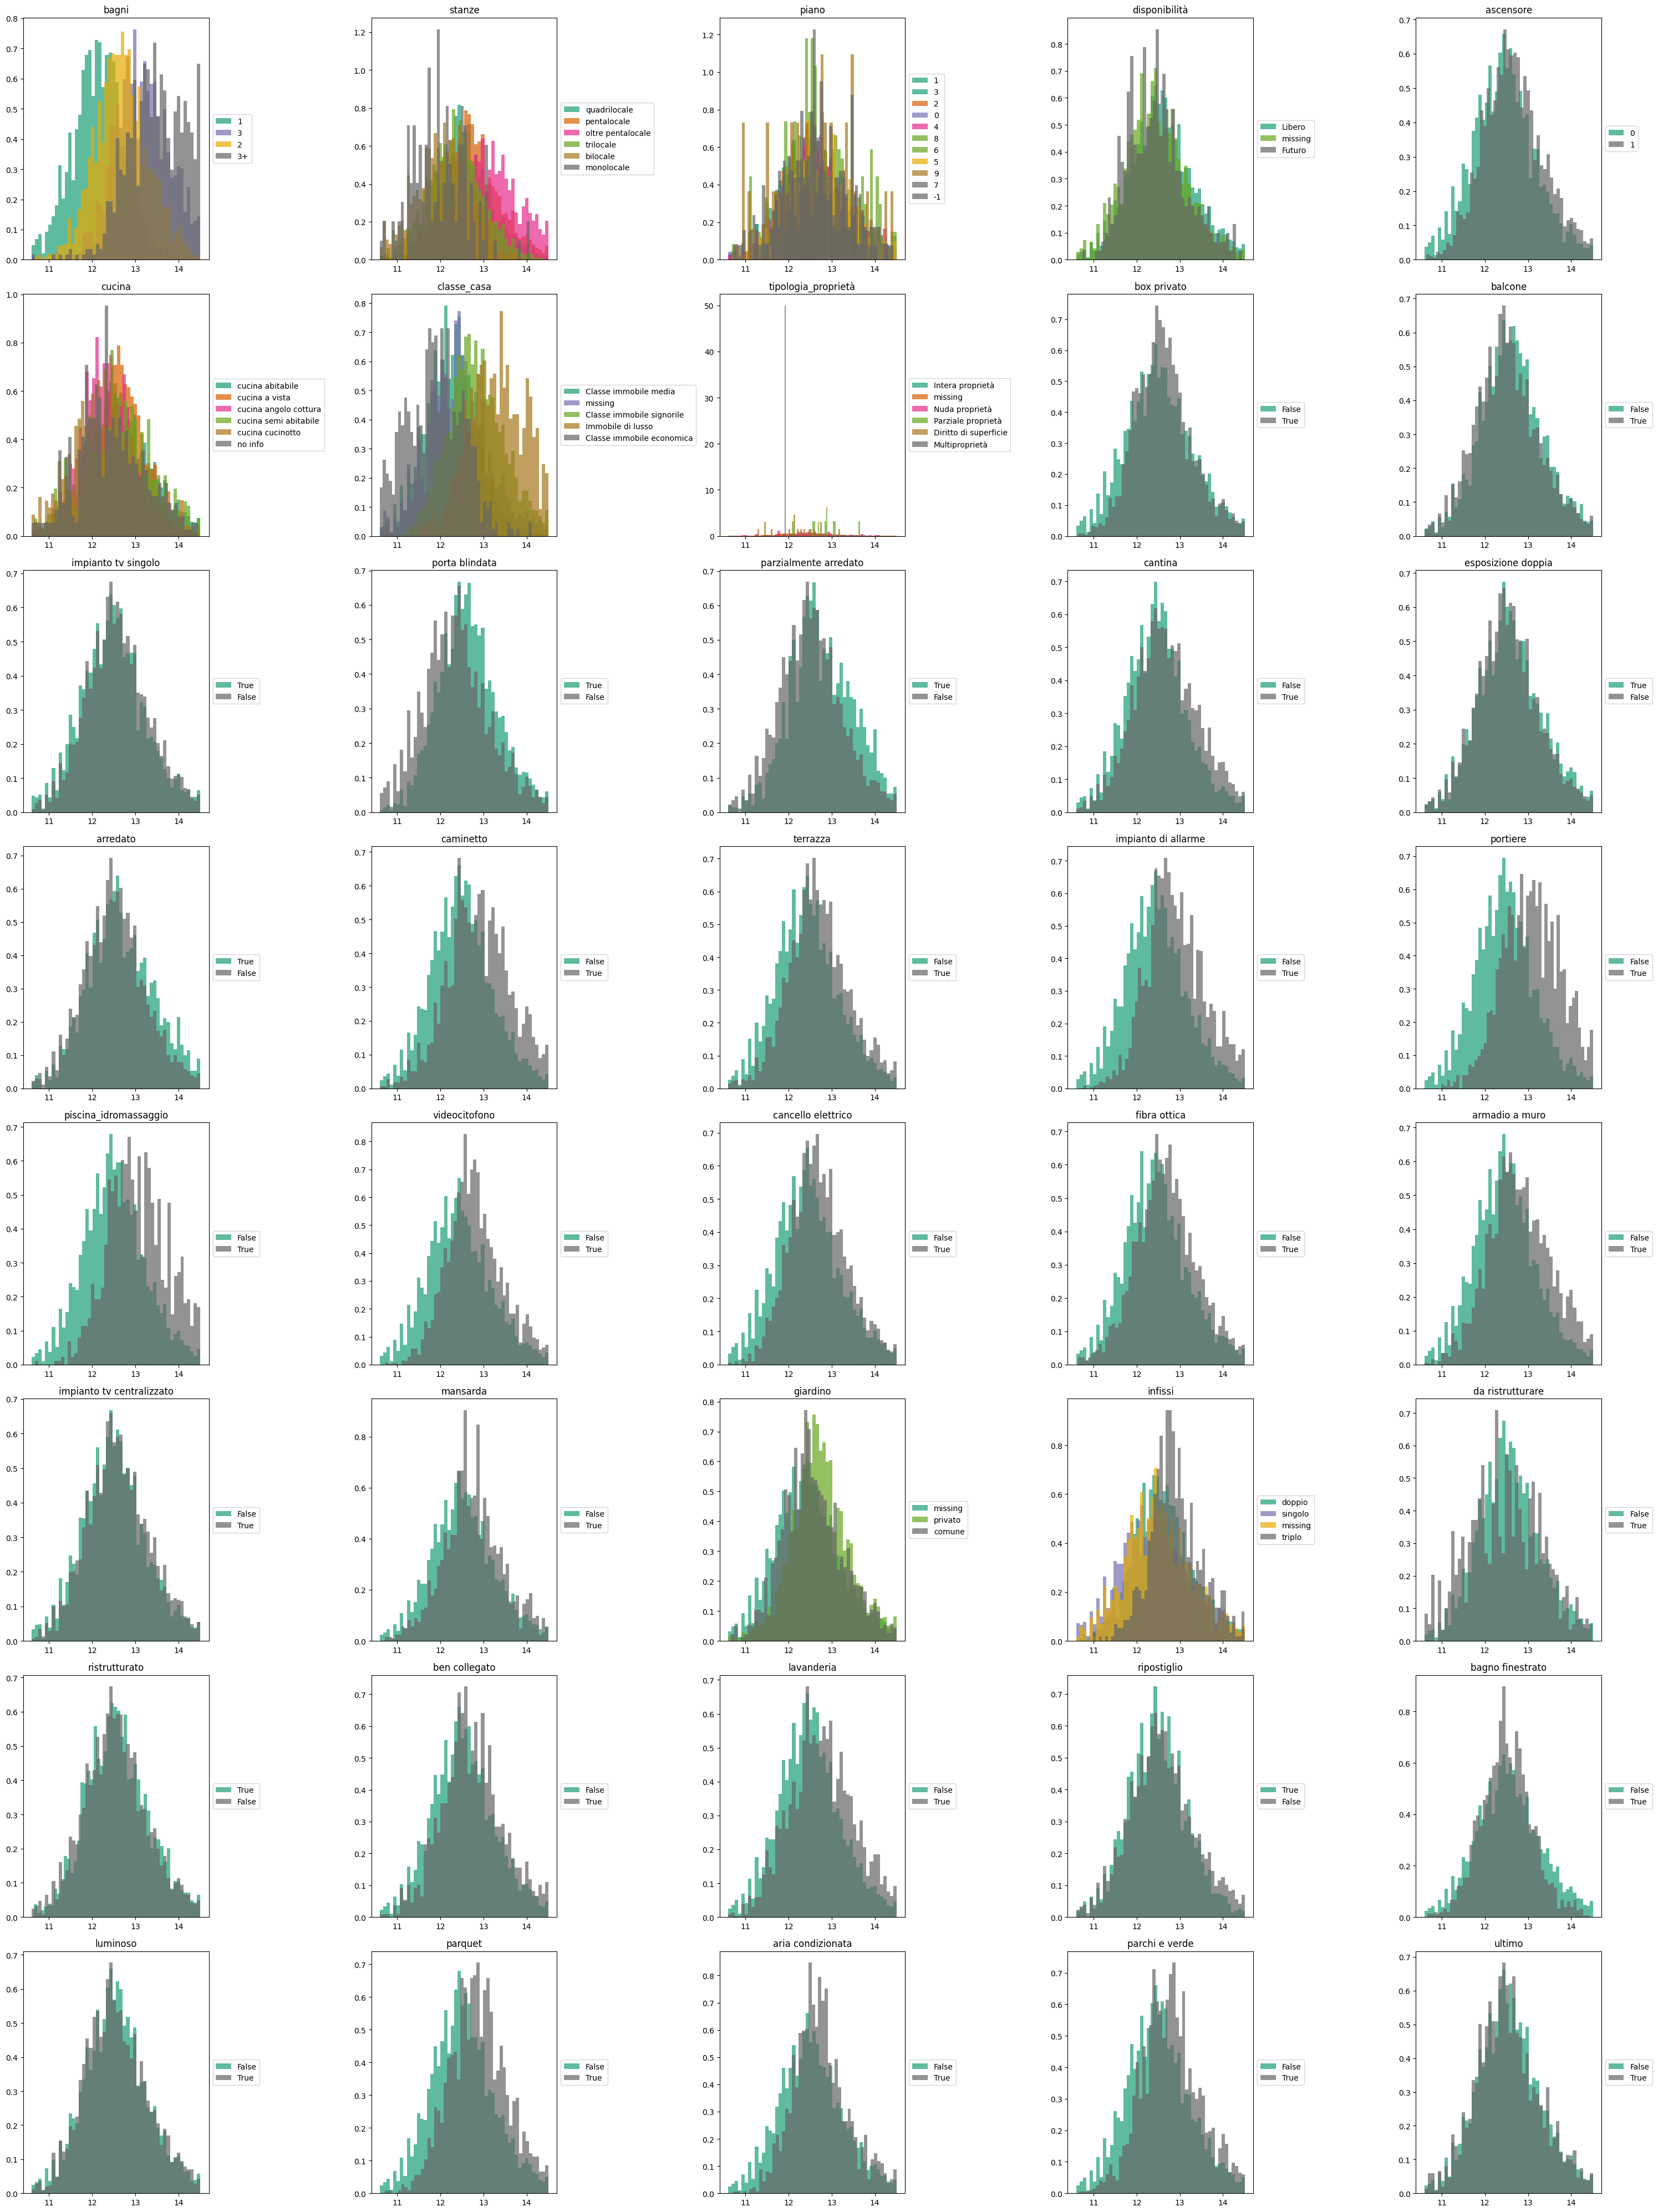

In [6]:
fig, axs = plt.subplots(ncols=5, nrows=8, figsize=(30,40))
axs=axs.ravel()
for i in range(len(categoricals)):
    ax=axs[i]
    ax.set_title(categoricals[i])
    plot_by_level(categoricals[i], df_data, ax=ax, var_to_plot='log_prezzo')
plt.tight_layout()

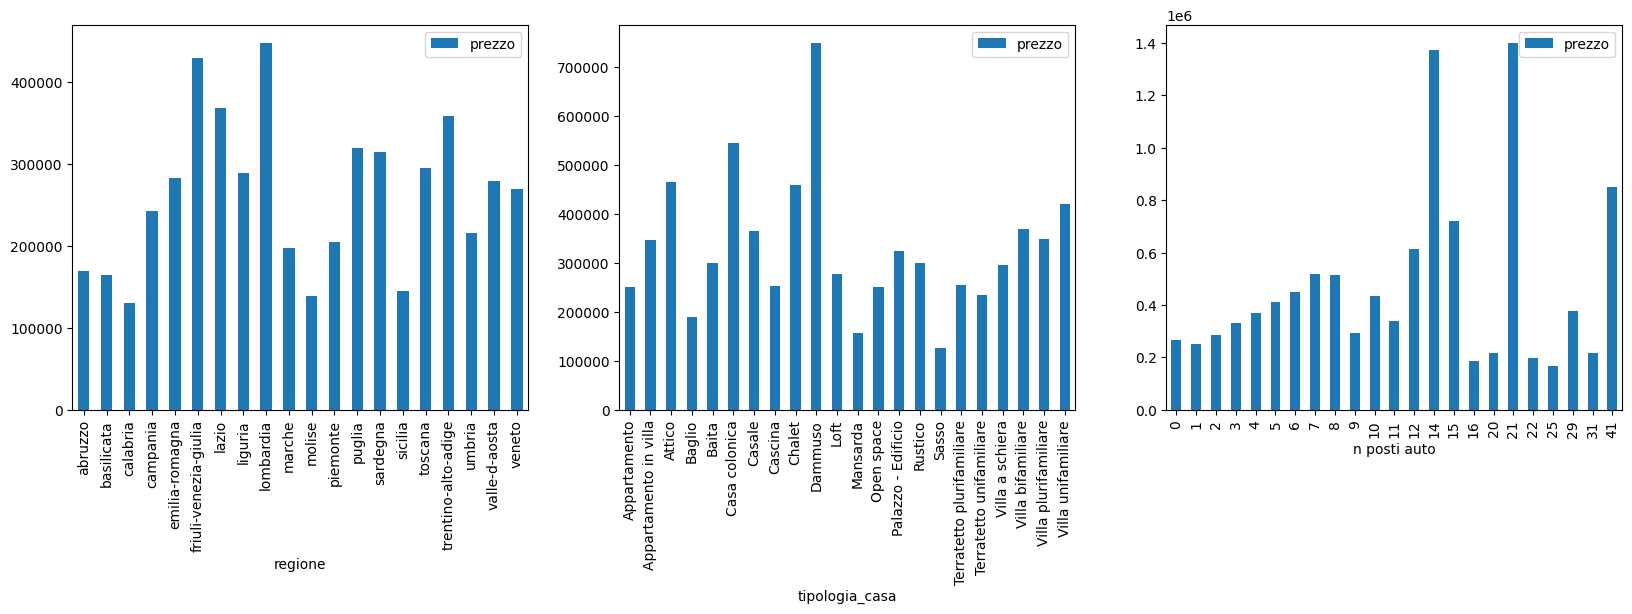

In [7]:
bar_cols = ['regione', 'tipologia_casa', 'n posti auto']
fig, axs = plt.subplots(ncols=3, figsize=(20,5))
axs=axs.ravel()
for i in range(len(bar_cols)):
    ax=axs[i]
    df_data.groupby(bar_cols[i])[['prezzo']].median().plot.bar(ax=ax)
plt.show()

In [8]:
embedding_cols = [i for i in df_data.columns if 'emb_' in i]
embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42).fit_transform(df_data[embedding_cols])

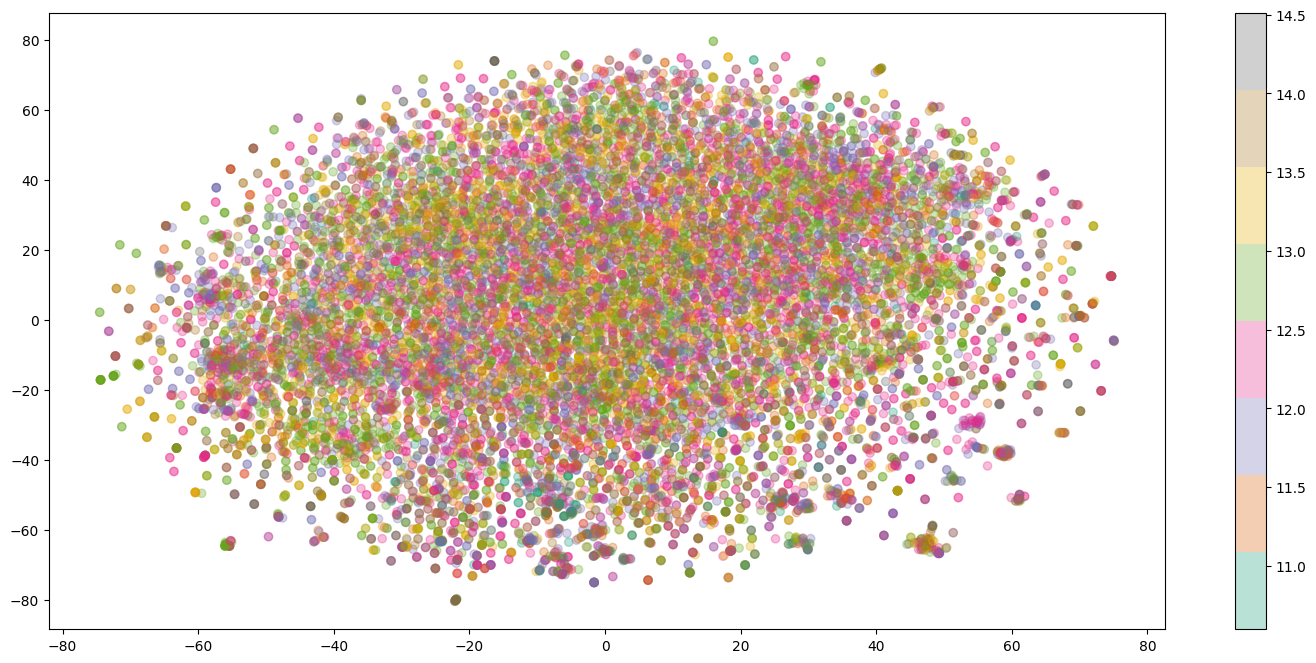

In [9]:
embedded_df = pd.DataFrame({'x': embedded[:,0], 'y':embedded[:,1],'price':df_data['log_prezzo']})
fig, ax = plt.subplots(figsize=(18,8))
cmap=mpl.colormaps['Dark2']
sc = ax.scatter(embedded_df['x'], embedded_df['y'], c=embedded_df['price'], cmap=cmap, alpha=0.3)
plt.colorbar(sc)
plt.show()